# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | emmett
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | maragogi
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | solenzo
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | hlotse
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | orodara
Processing Record 15 of Set 1 | pedernales
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | pundaguitan
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | chuy
Processing Record 23

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,emmett,43.8735,-116.4993,2.89,75,65,2.07,US,1677861931
1,mataura,-46.1927,168.8643,10.44,81,100,0.79,NZ,1677861932
2,maragogi,-9.0122,-35.2225,29.38,62,6,4.57,BR,1677861933
3,vaini,-21.2000,-175.2000,27.09,94,100,3.60,TO,1677861934
4,narsaq,60.9167,-46.0500,11.12,67,100,9.49,GL,1677861934


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\steph\Desktop\Data Analytics and Visualization\python-api-challenge\python-api-challenge\WeatherPy\output_data\city_data.csv", index_label = "City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\steph\Desktop\Data Analytics and Visualization\python-api-challenge\python-api-challenge\WeatherPy\output_data\city_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,emmett,43.8735,-116.4993,2.89,75,65,2.07,US,1677861931
1,mataura,-46.1927,168.8643,10.44,81,100,0.79,NZ,1677861932
2,maragogi,-9.0122,-35.2225,29.38,62,6,4.57,BR,1677861933
3,vaini,-21.2000,-175.2000,27.09,94,100,3.60,TO,1677861934
4,narsaq,60.9167,-46.0500,11.12,67,100,9.49,GL,1677861934


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

C:\Users\steph\AppData\Local\Temp\ipykernel_5540\1607671809.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")


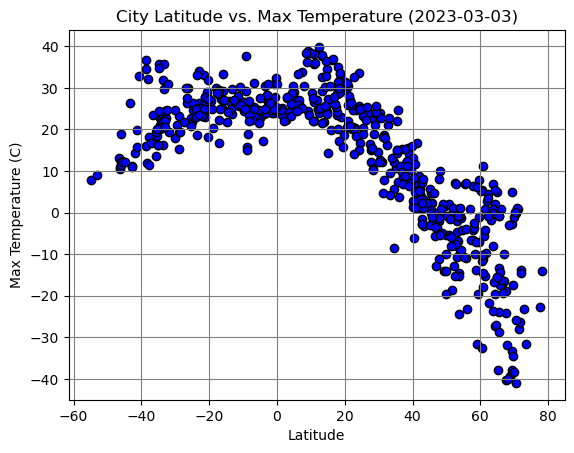

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black", facecolors = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-03-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")

# Save the figure
plt.savefig(r"C:\Users\steph\Desktop\Data Analytics and Visualization\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

C:\Users\steph\AppData\Local\Temp\ipykernel_5540\2544264665.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")


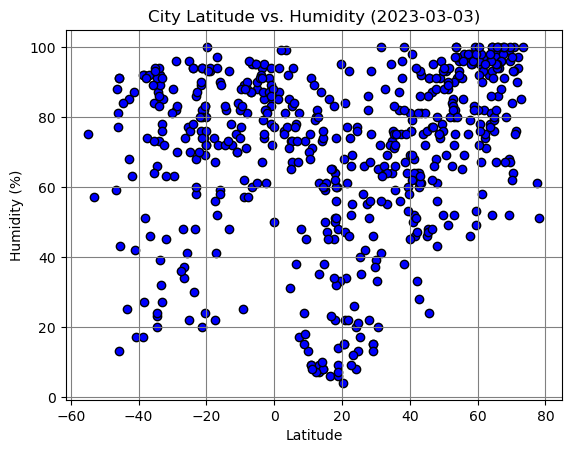

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", facecolors = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-03-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")

# Save the figure
plt.savefig(r"C:\Users\steph\Desktop\Data Analytics and Visualization\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

C:\Users\steph\AppData\Local\Temp\ipykernel_5540\3793556673.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")


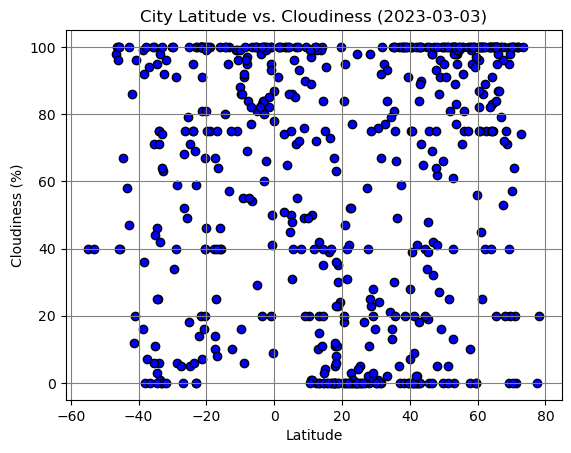

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", facecolors = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-03-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")

# Save the figure
plt.savefig(r"C:\Users\steph\Desktop\Data Analytics and Visualization\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

C:\Users\steph\AppData\Local\Temp\ipykernel_5540\847543458.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")


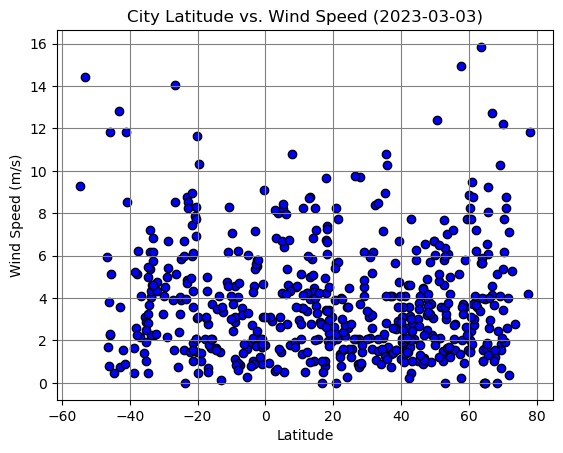

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black", facecolors = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-03-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color = "grey")

# Save the figure
plt.savefig(r"C:\Users\steph\Desktop\Data Analytics and Visualization\python-api-challenge\python-api-challenge\WeatherPy\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [107]:
# Define a function to create Linear Regression plots
def lin_reg_plot(data_frame, x_value, y_value, text_spot):
    slope, intercept, rvalue, pvalue, stderr = linregress (data_frame[x_value], data_frame[y_value])
    regression_values = slope * data_frame[x_value] + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    print(f"The r-value is: {rvalue}")
    print(f"Line Equation: {line_eq}")
    
    data_frame.plot(kind = "scatter", x = x_value, y = y_value, grid = True, edgecolors = "black", facecolors = "blue", s = 50, figsize = (10, 7))
    plt.plot(data_frame[x_value], regression_values, "r-")
    plt.annotate(line_eq, text_spot, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_value)
    plt.title(f"{y_value} vs. Latitude")
    
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,emmett,43.8735,-116.4993,2.89,75,65,2.07,US,1677861931
4,narsaq,60.9167,-46.0500,11.12,67,100,9.49,GL,1677861934
6,jamestown,42.0970,-79.2353,4.45,64,0,4.63,US,1677861668
8,solenzo,12.1833,-4.0833,38.36,8,0,3.37,BF,1677861936
9,upernavik,72.7868,-56.1549,-23.19,85,74,5.29,GL,1677861936


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mataura,-46.1927,168.8643,10.44,81,100,0.79,NZ,1677861932
2,maragogi,-9.0122,-35.2225,29.38,62,6,4.57,BR,1677861933
3,vaini,-21.2000,-175.2000,27.09,94,100,3.60,TO,1677861934
5,atuona,-9.8000,-139.0333,26.53,77,16,7.07,PF,1677861935
7,hithadhoo,-0.6000,73.0833,27.81,72,41,4.64,MV,1677861935


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8823584966416307
Line Equation: y = -0.79x + 38.13


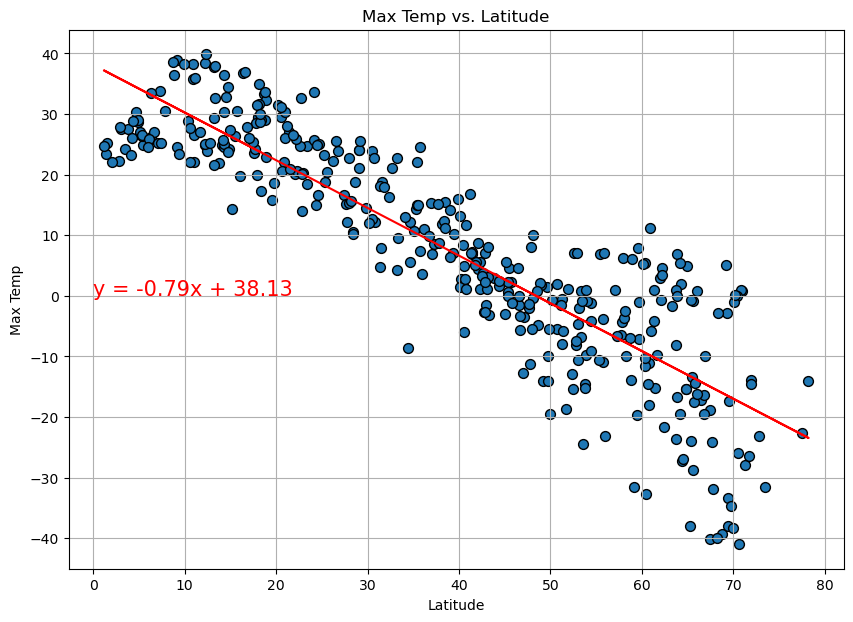

In [108]:
# Linear regression on Northern Hemisphere

lin_reg_plot(northern_hemi_df, "Lat", "Max Temp", (0, 0))

The r-value is: 0.4707985153667653
Line Equation: y = 0.2x + 28.3


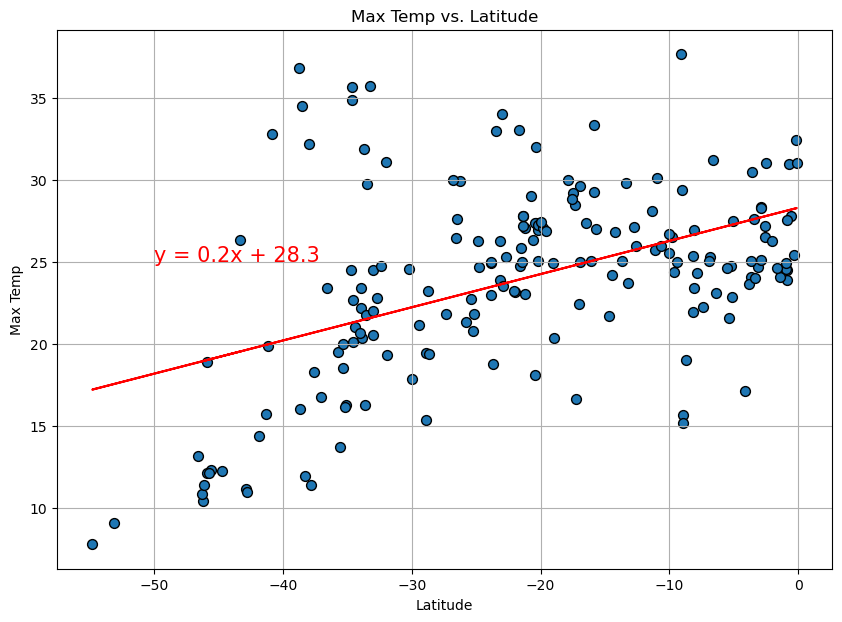

In [106]:
# Linear regression on Southern Hemisphere

lin_reg_plot(southern_hemi_df, "Lat", "Max Temp", (-50, 25))

**Discussion about the linear relationship:** These graphs shows practically inverse results for each hemisphere. For the nothern hemisphere as latitude increases, max temperature decreases. For the southern hemisphere as latitude increases, max temperature increases. This makes sense considering that as you get closer to the equator, the max temperature gets higher. These graphs clearly illustrate between temperature and relative location to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.48754181696844967
Line Equation: y = 0.61x + 44.32


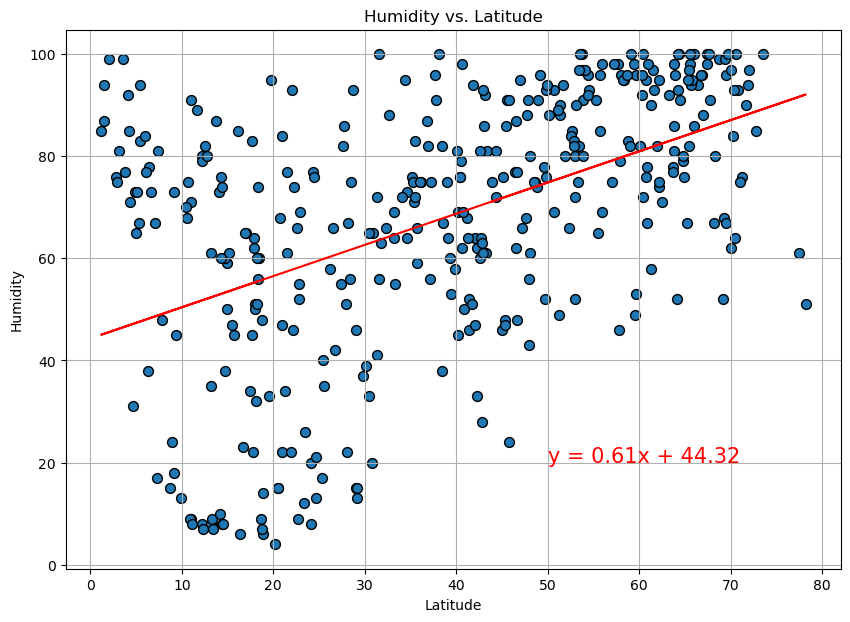

In [111]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, "Lat", "Humidity", (50, 20))

The r-value is: 0.2595204773077842
Line Equation: y = 0.4x + 81.25


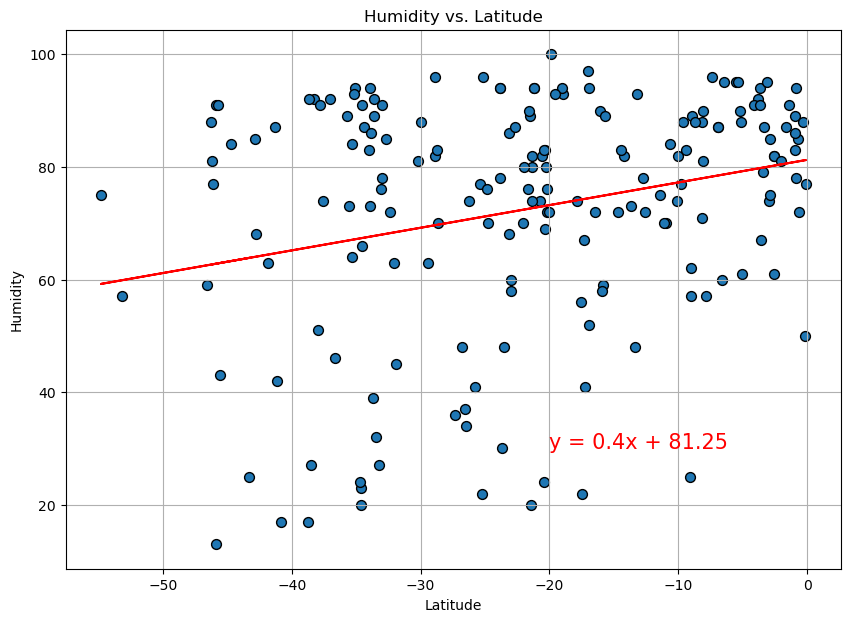

In [114]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, "Lat", "Humidity", (-20, 30))

**Discussion about the linear relationship:** Looking at thess graphs with no linear regression, it probably just looks like a random group of dots that increases as you go up and right. It shows that for the most part, as latitude increases in both hemispheres, humidity also increases. These charts show very similar results with the northern hemisphere having more data points and showing a more dramatic linear regression. It seemingly has nothing to do with regression which is odd.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3039410119803861
Line Equation: y = 0.59x + 33.84


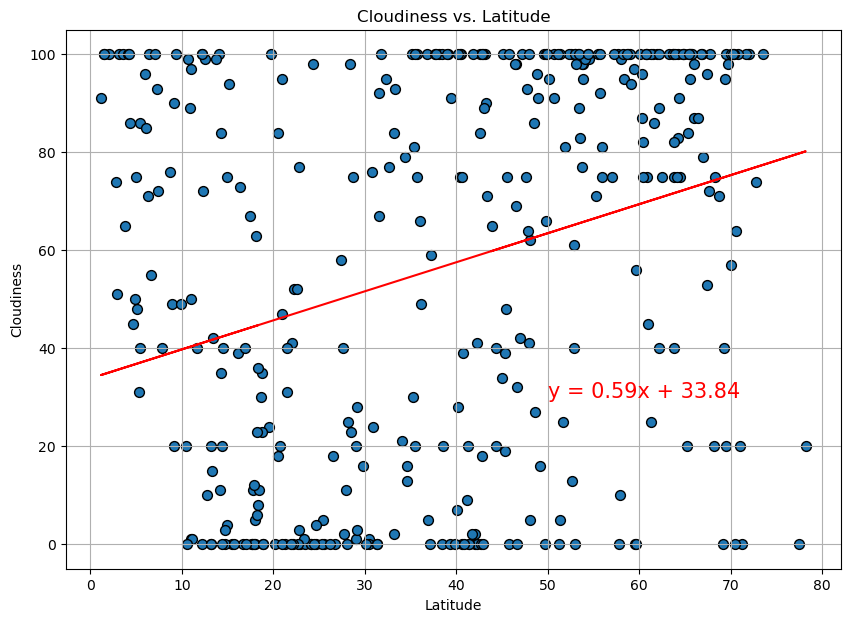

In [116]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, "Lat", "Cloudiness", (50, 30))

The r-value is: 0.2180750058914526
Line Equation: y = 0.56x + 76.59


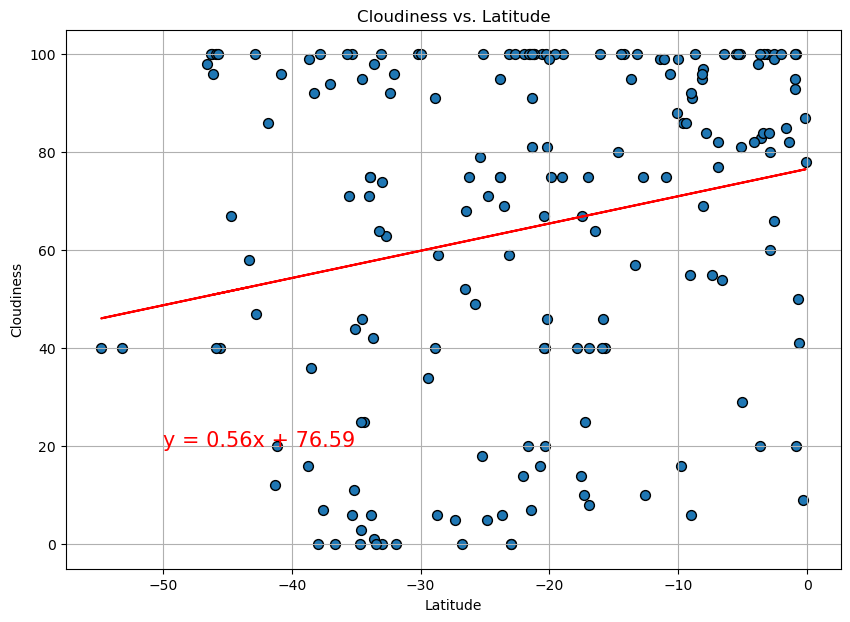

In [120]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, "Lat", "Cloudiness", (-50, 20))

**Discussion about the linear relationship:** These graphs seemingly don't show much relation between latitude and cloudiness. For both of them, as latitude increases so does cloudiness. It looks like there is not real correlation between both variables on each axis.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03817170727071249
Line Equation: y = 0.0x + 3.57


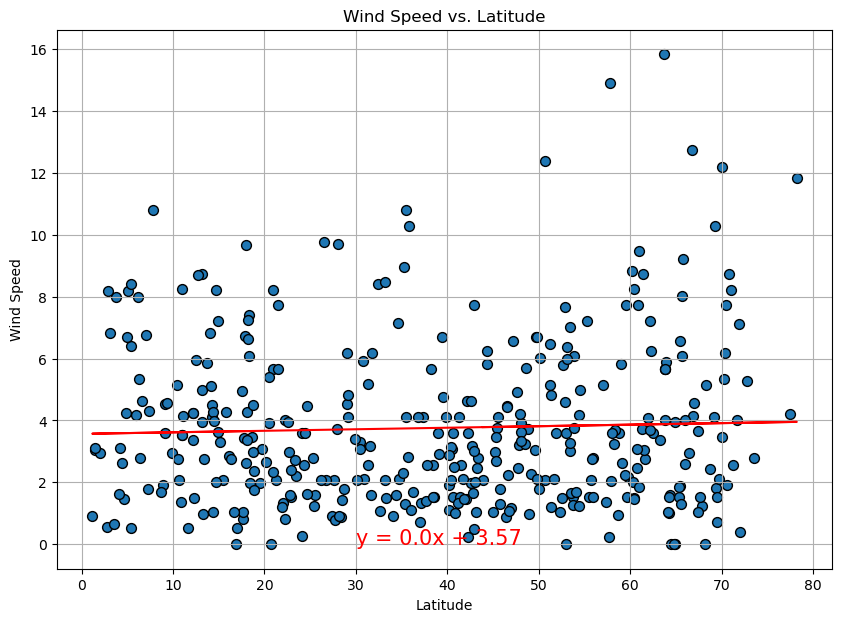

In [118]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, "Lat", "Wind Speed", (30, 0))

The r-value is: -0.21151448860242678
Line Equation: y = -0.04x + 3.0


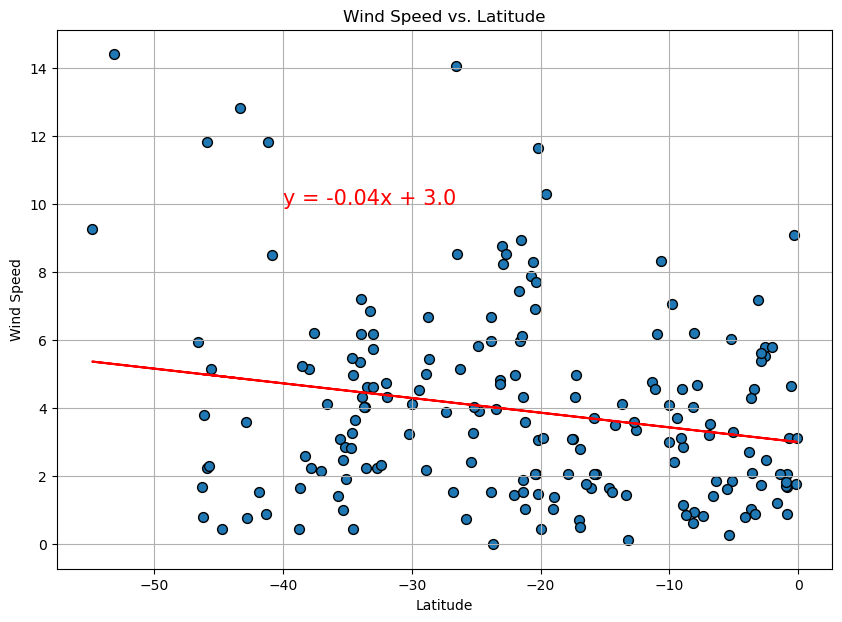

In [122]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, "Lat", "Wind Speed", (-40, 10))

**Discussion about the linear relationship:** This looks like another set of graphs that don't really show any correlation. In fact they show slightly different regression lines for each. This shows there ios no real correlation between wind speed and latitude.